In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%%time
babies = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
babies


Wall time: 16.8 s


In [3]:
babies.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [4]:
babies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [5]:
babies.drop('Unnamed: 0', axis=1, inplace=True)

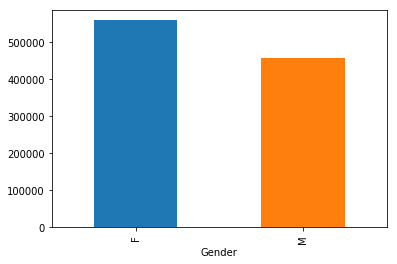

In [6]:
babies.groupby('Gender').size().plot(kind='bar')

In [7]:
babies_name= babies.groupby(['Name']).count().sort_values('Id', ascending =False)
babies_name.Id.head()

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Id, dtype: int64

In [8]:
babies_name.Id.count()//2

8816

In [9]:
#Median occurence of name
babies_name.columns

Index(['Id', 'Year', 'Gender', 'State', 'Count'], dtype='object')

In [10]:
babies1= babies.groupby(['Name']).count().sort_values('Id', ascending =True)
# babies1.iloc[count()//2]

In [11]:
babies1.iloc[babies1.count()//2]

,Id,Year,Gender,State,Count
Name,,,,,
Tanush,8,8,8,8,8
Tanush,8,8,8,8,8
Tanush,8,8,8,8,8
Tanush,8,8,8,8,8
Tanush,8,8,8,8,8


In [13]:
type(babies)

pandas.core.frame.DataFrame

Wall time: 1.32 s


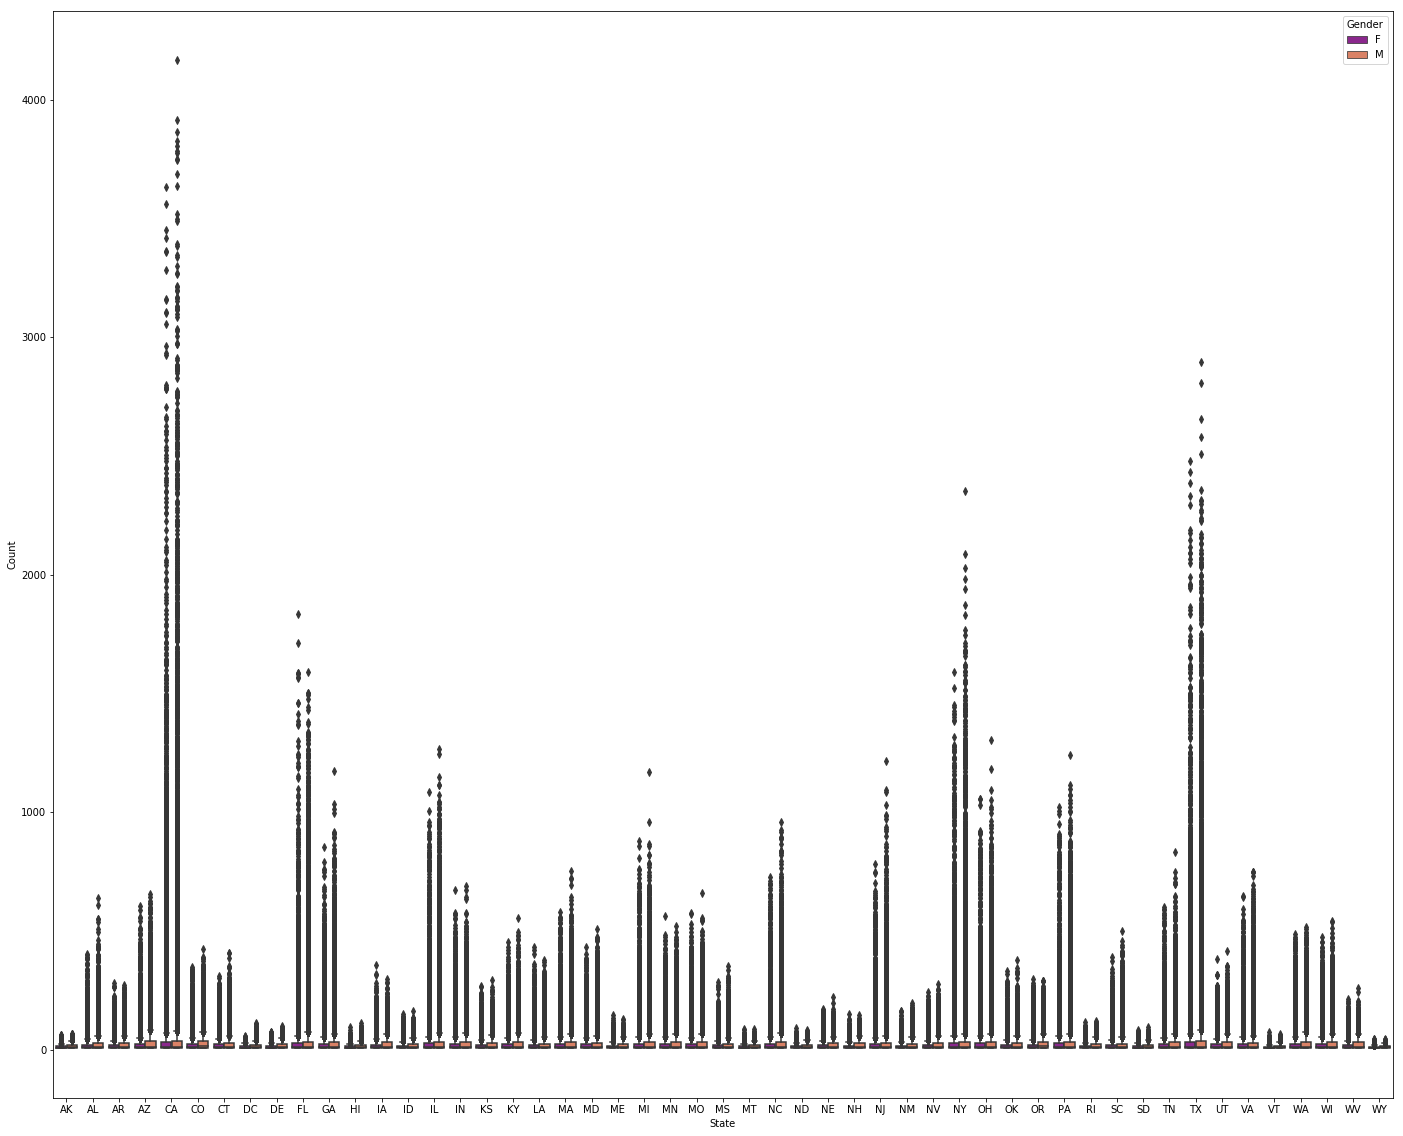

In [62]:
%%time
fig = plt.figure(figsize=(24,20))
sns.boxplot(x="State", y="Count", hue="Gender", data=babies, palette="plasma")

In [ ]:
# TASK 2

In [66]:
import matplotlib.pyplot as plt
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [105]:

months = np.arange(12)
temp_max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
temp_min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [42, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [15, 25, 5])


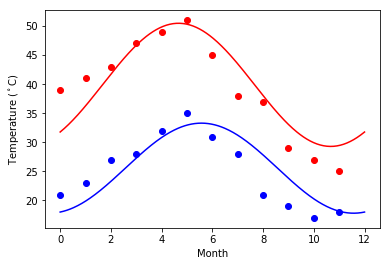

In [106]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, res_max[0], res_max[1], res_max[2]), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()